In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
% matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.style.use(['fivethirtyeight'])

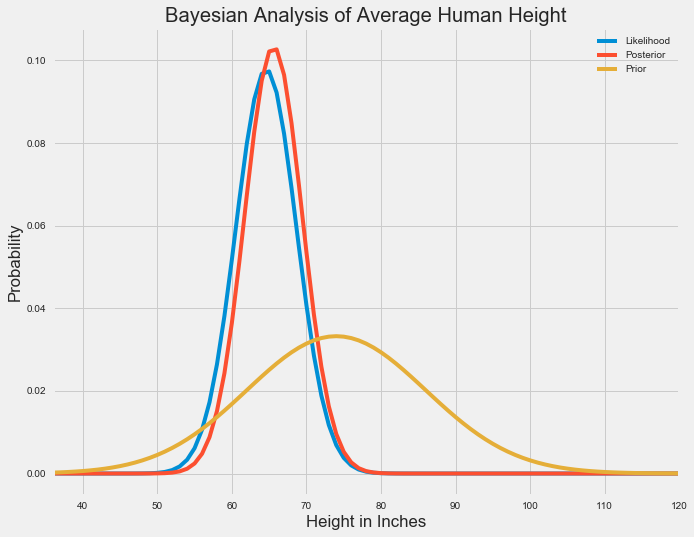

In [56]:
# Easy demonstration of Bayesian analysis:
# Lets say we are estimating average height

# These are all the possible values for average height (in inches), as far as I am concerned
heights = np.arange(36, 121)
# For our purposes, we think it is impossible the average height of a person is less than 3 ft or more than 10.

# Prior beliefs:
# I believe, before looking at the data, that the average adult height is 5'6'', but I'm super unsure of that.
# My belief is represented by a normal distribution with mean 5'6'' and standard deviation 6'':
def normal_prior(height, mean=74, std=12):
    return(stats.norm(mean, std).pdf(height))

prior_values = [normal_prior(height) for height in heights]

# Now we collect data, lets say we measure 5 people's heights:
data = [60, 62, 64, 72, 65]

# Assuming the normal distribution best describes the likelihood of observing our data,
# the likely values of our parameter given this data are given by a normal distribution
# with mean and standard deviation equal to the sample mean and sample standard deviation:

data_mean = np.mean(data)
data_std  = np.std(data)

def normal_likelihood(height, mean=data_mean, std=data_std):
    return(stats.norm(mean, std).pdf(height))

likelihood_values = [normal_likelihood(height) for height in heights]

# The posterior distribution is given by multiplying the prior and the likelihood:

posterior_values = [normal_likelihood(height)*normal_prior(height) for height in heights]


# We haven't normalized our posterior values by dividing by the marginal likelihood of observing our data.
# But we can just force the posterir values to sum to one:
def sum_to_one(posterior):
    return([x/sum(posterior) for x in posterior])

posterior_values = sum_to_one(posterior_values)





bayes = pd.DataFrame({'Prior':prior_values, 'Likelihood':likelihood_values, 'Posterior':posterior_values})
bayes = bayes.set_index(heights)


_ = bayes.plot()
_ = plt.title('Bayesian Analysis of Average Human Height')
_ = plt.ylabel('Probability')
_ = plt.xlabel('Height in Inches')

In [52]:
data_mean

64.599999999999994

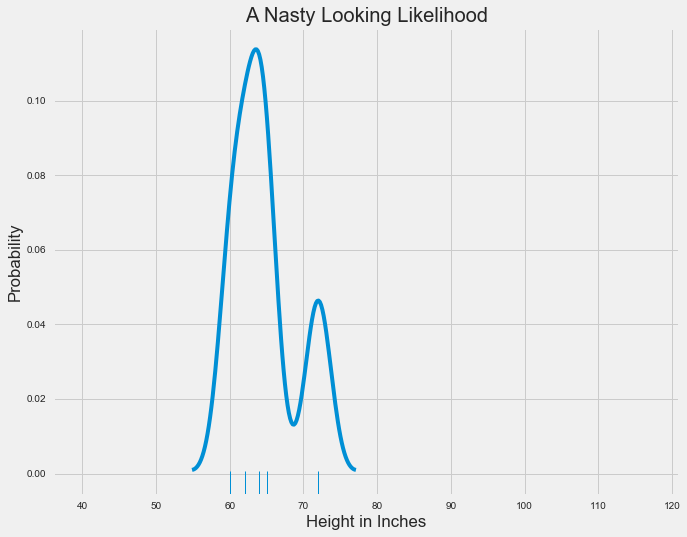

In [58]:
# What if we don't have well-defined prior beliefs?
_ = sns.distplot(data, bins = 5, rug=True, hist=False) #, rug_kws={'m':50})
_ = plt.title('A Nasty Looking Likelihood')
_ = plt.xlim((36,121))
_ = plt.ylabel('Probability')
_ = plt.xlabel('Height in Inches')

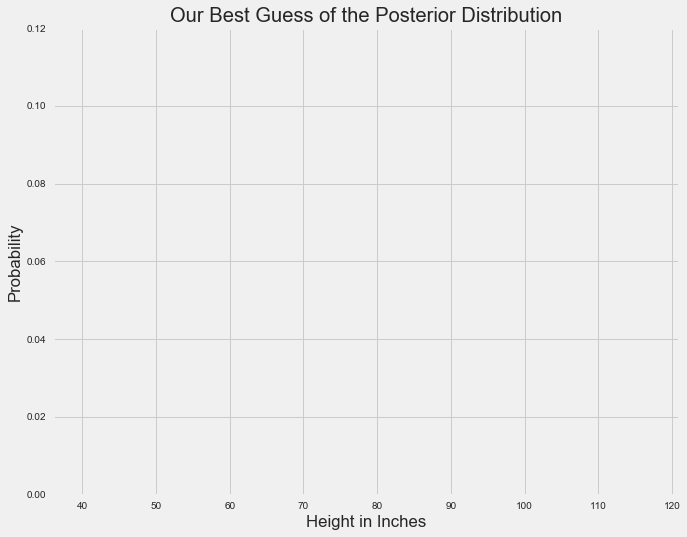

In [63]:
_ = plt.figure()
_ = plt.ylim((0, .12))
_ = plt.xlim((36,121))
_ = plt.ylabel('Probability')
_ = plt.xlabel('Height in Inches')
_ = plt.title('Our Best Guess of the Posterior Distribution')